# KUALA LUMPUR SCHOOL OF ARTIFICIAL INTELLIGENCE, FEBRUARY 2019
## SENTIMENT ANALYSIS BY PURNIMA WIJENDRA

###Sentiment Analysis & Visualisation

# KUALA LUMPUR SCHOOL OF ARTIFICIAL INTELLIGENCE, FEBRUARY 2019
##SENTIMENT ANALYSIS BY PURNIMA WIJENDRA

 
OUTLINE
- Introduction 
- Scraping Social Media - Twitter
- Cleaning data
- Applying Sentiment Polarity
- Visualisation 
- Word Cloud


## **Installing Library**

In [0]:
!pip install textblob

## **Importing Libraries**

In [0]:
import csv
import pandas as pd
import io #if you are using google collab and importing files
import numpy as np
import re
from textblob import TextBlob

## Importing Data Set

If you are using Jupyter Notebook on local skip the step below (importing files)

data = pd.read_csv("friedchick.csv")


In [0]:
from google.colab import files
upload = files.upload()

Saving friedchick.csv to friedchick.csv


In [0]:
df = pd.read_csv(io.StringIO(upload['friedchick.csv'].decode('cp1252')))
df.head()

,date,tweet
0,15/02/2019 9:14,b'NEWS: KFC SPREADS US$150M WINGS IN ZIMnnThe ...
1,15/02/2019 9:13,"b""RT @skizyman: I still can't believe there wa..."
2,15/02/2019 9:13,b'RT @DanneelHarris: Happy Valentine Day to my...
3,15/02/2019 9:11,b'KFC Has A Fried Chicken Sandwich With Mac &a...
4,15/02/2019 9:10,"b""RT @skizyman: I still can't believe there wa..."


In [0]:
df.describe()

,date,tweet
count,16606,16606
unique,4700,9315
top,14/02/2019 19:04,"b'RT @ItsFoodPorn: Fried Chicken, Fries &amp; ..."
freq,27,710


## Sentiment Analysis

In [0]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

df['sentiment'] = df['tweet'].apply(sentiment_calc)

In [0]:
df.head()

,date,tweet,sentiment
0,15/02/2019 9:14,b'NEWS: KFC SPREADS US$150M WINGS IN ZIMnnThe ...,"(-0.3, 0.475)"
1,15/02/2019 9:13,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)"
2,15/02/2019 9:13,b'RT @DanneelHarris: Happy Valentine Day to my...,"(0.325, 0.5305555555555554)"
3,15/02/2019 9:11,b'KFC Has A Fried Chicken Sandwich With Mac &a...,"(-0.6, 0.95)"
4,15/02/2019 9:10,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)"


In [0]:
df.iloc[:1]

,date,tweet,sentiment
0,15/02/2019 9:14,b'NEWS: KFC SPREADS US$150M WINGS IN ZIMnnThe ...,"(-0.3, 0.475)"


In [0]:
df.iloc[:1]['tweet']

0    b'NEWS: KFC SPREADS US$150M WINGS IN ZIMnnThe ...
Name: tweet, dtype: object

# Cleaning & Analysis Tweets & Sentiment

In [0]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [0]:
df.head()

In [0]:
# We create a column with the result of the analysis:
df['SA'] = np.array([ analize_sentiment(text) for text in df['tweet'] ])

# We display the updated dataframe with the new column:
display(df.head(10))

,date,tweet,sentiment,SA
0,15/02/2019 9:14,b'NEWS: KFC SPREADS US$150M WINGS IN ZIMnnThe ...,"(-0.3, 0.475)",-1
1,15/02/2019 9:13,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)",0
2,15/02/2019 9:13,b'RT @DanneelHarris: Happy Valentine Day to my...,"(0.325, 0.5305555555555554)",1
3,15/02/2019 9:11,b'KFC Has A Fried Chicken Sandwich With Mac &a...,"(-0.6, 0.95)",-1
4,15/02/2019 9:10,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)",0
5,15/02/2019 9:10,"b""f09f8d94TODAY'S BURGER OF THE DAY is our Fla...","(-0.3, 0.475)",-1
6,15/02/2019 9:10,b'RT @DanneelHarris: Happy Valentine Day to my...,"(0.325, 0.5305555555555554)",1
7,15/02/2019 9:08,"b""RT @skizyman: I still can't believe there wa...","(0.0, 0.0)",0
8,15/02/2019 9:08,b'RT @d0nghues: #ikonicselcaday our faces when...,"(0.0, 0.0)",0
9,15/02/2019 9:07,"b'RT @ItsFoodPorn: Fried Chicken, Fries &amp; ...","(-0.6, 0.95)",-1


In [0]:
mean = np.mean(df['SA'])
print("The sentiments average in tweets: {}".format(mean))

The sentiments average in tweets: -0.6056244730820185


**Breakdown of Sentiment**

In [0]:
pos_tweets = [ tweet for index, tweet in enumerate(df['tweet']) 
              if df['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['tweet']) 
              if df['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['tweet']) 
              if df['SA'][index] < 0]

In [0]:
per_pos = len(pos_tweets)*100/len(df['tweet'])
per_neu = len(neu_tweets)*100/len(df['tweet'])
pet_neg = len(neg_tweets)*100/len(df['tweet'])

In [0]:
print(per_pos)
print(per_neu)
print(pet_neg)

15.958087438275323
7.521377815247501
76.52053474647718


## **Visualisation**

In [0]:
import matplotlib.pyplot as plt

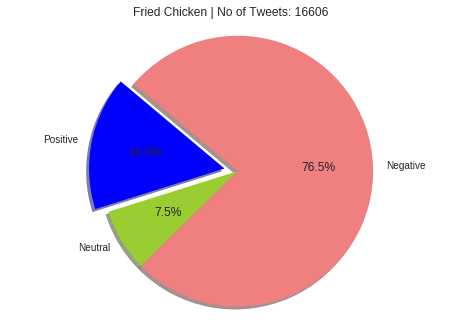

In [0]:
# Data to plot
labels = 'Positive','Neutral','Negative'
sizes = [per_pos, per_neu, pet_neg]
colors = ['blue', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Fried Chicken | No of Tweets: 16606')
plt.axis('equal')
plt.show()



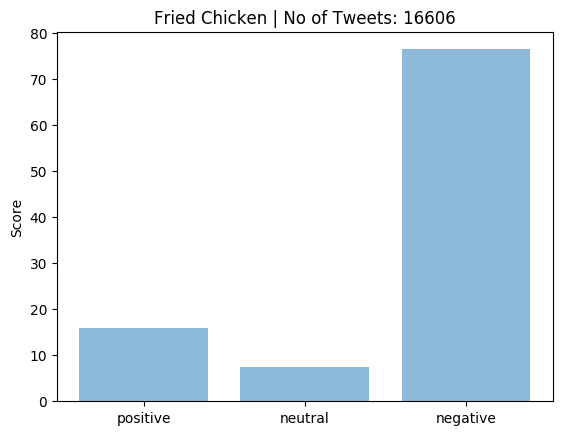

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
#import matplotlib.pyplot as plt
 
objects = ("positive","neutral","negative" )
y_pos = np.arange(len(objects))
performance = [per_pos, per_neu, pet_neg]
 
 
plt.bar(objects, performance, align='center', alpha=0.5)
plt.xticks(objects, objects)
plt.ylabel('Score')
plt.title('Fried Chicken | No of Tweets: 16606')
 
plt.show()

## Generating WordCloud

In [0]:
!pip install wordcloud

In [0]:
!pip install pillow

In [0]:
from wordcloud import WordCloud

In [0]:
df_wc = " ".join(text for text in df.tweet)
print ("There are {} words in the combination of all review.".format(len(df_wc)))



There are 1954301 words in the combination of all review.


In [0]:
wordcloud2 = WordCloud(background_color="white").generate(df_wc)

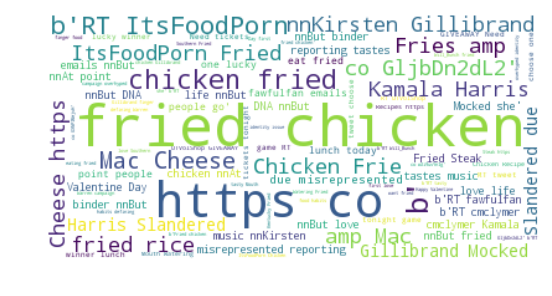

In [0]:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

## Negative Word Cloud


In [0]:
newc = df.loc[df['SA'] == -1]
neText = " ".join(tweet for tweet in newc.tweet)
print("There are {} words in the combination of all tweets.".format(len(neText)))

There are 1444579 words in the combination of all tweets.


In [0]:
wordcloud_ne = WordCloud(background_color="white").generate(neText)

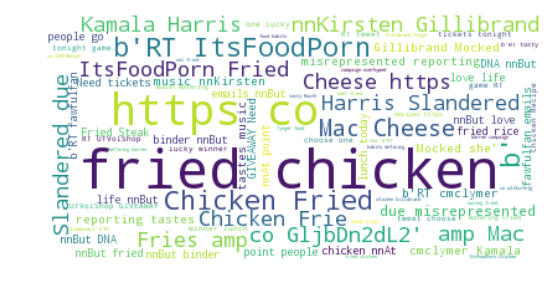

In [0]:
plt.imshow(wordcloud_ne, interpolation='bilinear')
plt.axis("off")
plt.show()

## Positive Word Cloud

In [0]:
powc = df.loc[df['SA'] == 1]
poText = " ".join(tweet for tweet in powc.tweet)
print("There are {} words in the combination of all tweets.".format(len(poText)))

There are 346559 words in the combination of all tweets.


In [0]:
wordcloud_po = WordCloud(background_color="white").generate(poText)

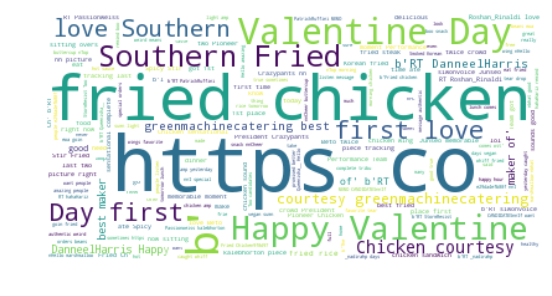

In [0]:
plt.imshow(wordcloud_po, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Neutral Word Cloud**

In [0]:
newc = df.loc[df['SA'] == 0]
neText = " ".join(tweet for tweet in newc.tweet)
print("There are {} words in the combination of all tweets.".format(len(neText)))

There are 163161 words in the combination of all tweets.


In [0]:
wordcloud_ne = WordCloud(background_color="white").generate(neText)

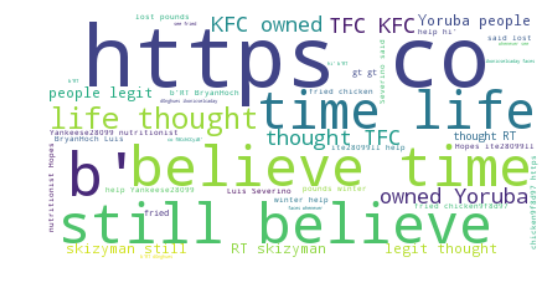

In [0]:
plt.imshow(wordcloud_ne, interpolation='bilinear')
plt.axis("off")
plt.show()

# **To be continued in Part 2.....**